# Imports and functions

In [ ]:
from ml_experiments.utils import unflatten_dict, update_recursively
from ml_experiments.tuners import OptunaTuner
from sklearn.metrics.cluster import adjusted_rand_score
from recursive_clustering.experiment.spherical_clustering import generate_spherical_clusters, visualize_3d_data
from recursive_clustering.models.cohirf_parents import ModularCoHiRF
from recursive_clustering.models.kernel_kmeans import KernelKMeans
from recursive_clustering.models.pseudo_kernel import PseudoKernelClustering
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.cluster import KMeans
import optuna
from functools import partial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def training_fn(trial, model_cls, model_kwargs, features, true_labels):
    params = trial.params
    parsed_params = unflatten_dict(params)
    parsed_params = update_recursively(parsed_params, model_kwargs)
    model = model_cls(**parsed_params)
    labels = model.fit_predict(features)
    return adjusted_rand_score(true_labels, labels)

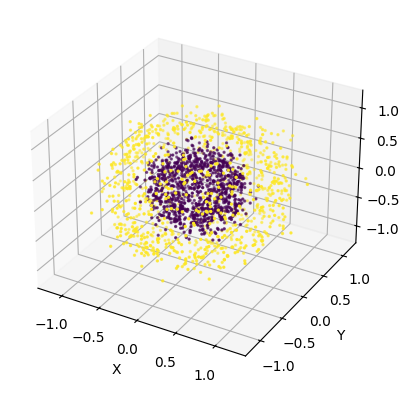

In [3]:
# dataset parameters
mean_r = [0.5, 1]  # Mean radii of the spheres
std = 0.1                 # Standard deviation for the radii
seed_dataset = 42
features, true_labels = generate_spherical_clusters(mean_r, std, num_points_per_sphere=1000, seed=seed_dataset)

visualize_3d_data(features, true_labels)

features = np.hstack((features, np.sum(features**2, axis=1, keepdims=True)))

# CoHiRF base

In [4]:
seed = 42
generator = np.random.RandomState(seed)
seeds = generator.randint(0, 10000, size=10)
results = {}
for seed in seeds:
    random_state_model = int(seed)
    model_cls = ModularCoHiRF
    search_space = {
        "repetitions": optuna.distributions.IntDistribution(2, 10),
    }
    model_kwargs = {
        "n_features": 2,
        "representative_method": "rbf",
        "base_model": KMeans,
        "base_model_kwargs": dict(n_clusters=2),
        # "transform_method": RBFSampler,
        # "transform_kwargs": {"n_components": 500},
        "random_state": random_state_model,
        "sample_than_transform": True,
    }
    training_fn_model = partial(
        training_fn, model_cls=model_cls, model_kwargs=model_kwargs, features=features, true_labels=true_labels
    )
    tuner = OptunaTuner(sampler="tpe", n_trials=100, seed=random_state_model)
    study = tuner.tune(training_fn=training_fn_model, search_space=search_space, direction="maximize")
    best_params = study.best_params
    best_value = study.best_value
    results[seed] = dict(best_params=best_params.copy(), best_value=best_value)
    best_params = unflatten_dict(best_params)
    best_params = update_recursively(best_params, model_kwargs)
    model = model_cls(**best_params)
    labels = model.fit_predict(features)
    n_clusters = len(np.unique(labels))
    results[seed]["n_clusters"] = n_clusters

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:45:56,302] A new study created in memory with name: no-name-30673d46-12ae-42af-ba2a-7a57bba914d3


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:46:11,386] A new study created in memory with name: no-name-a263b1ca-d001-4e40-843b-bfcce1d79bb4


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:46:23,304] A new study created in memory with name: no-name-fe633537-ab35-4a82-ac16-7562d12cb10d


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:46:38,172] A new study created in memory with name: no-name-4e10c950-2f25-428f-89a8-c97552b47455


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:46:51,548] A new study created in memory with name: no-name-cd464c75-1963-4850-8073-a8a7df0a11b5


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:46:59,897] A new study created in memory with name: no-name-839e46c7-482d-4297-9054-9cc775e5b2f2


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:47:13,724] A new study created in memory with name: no-name-d2e2dde5-ed4a-459b-9abe-cf6ebb4a5383


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:47:25,703] A new study created in memory with name: no-name-4866949b-3a55-4fbe-b30a-60b715c9d439


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:47:38,162] A new study created in memory with name: no-name-ddda1bf8-1f61-4c2d-b551-4568a96f6891


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:47:52,451] A new study created in memory with name: no-name-8e2c36bd-ea10-43c8-b94c-7b0384019630


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame.from_dict(results, orient="index")
df = pd.concat([df.drop("best_params", axis=1), df["best_params"].apply(pd.Series)], axis=1)
max_best_value = df["best_value"].max()
min_best_value = df["best_value"].min()
std_best_value = df["best_value"].std()
display(df)
print(f"Max Best Value: {max_best_value}, Min Best Value: {min_best_value}, Std Best Value: {std_best_value}")

,best_value,n_clusters,repetitions
7270,0.341175,9,10
860,0.370733,4,9
5390,0.659984,4,2
5191,0.722085,4,7
5734,0.151549,6,7
6265,0.182835,2,2
466,0.722154,5,7
4426,0.964306,2,2
5578,0.509668,8,3
8322,0.680967,3,2


Max Best Value: 0.9643061487175305, Min Best Value: 0.15154885624894562, Std Best Value: 0.2640093353218464


# CoHiRF RBF

In [6]:
seed = 42
generator = np.random.RandomState(seed)
seeds = generator.randint(0, 10000, size=10)
results = {}
for seed in seeds:
    random_state_model = int(seed)
    model_cls = ModularCoHiRF
    search_space = {
        "repetitions": optuna.distributions.IntDistribution(2, 10),
        "transform_kwargs": dict(gamma=optuna.distributions.FloatDistribution(0.1, 30)),
    }
    model_kwargs = {
        "n_features": 2,
        "representative_method": "rbf",
        "base_model": KMeans,
        "base_model_kwargs": dict(n_clusters=2),
        "transform_method": RBFSampler,
        "transform_kwargs": {"n_components": 500},
        "random_state": random_state_model,
        "sample_than_transform": True,
    }
    training_fn_model = partial(
        training_fn, model_cls=model_cls, model_kwargs=model_kwargs, features=features, true_labels=true_labels
    )
    tuner = OptunaTuner(sampler="tpe", n_trials=20, seed=random_state_model)
    study = tuner.tune(training_fn=training_fn_model, search_space=search_space, direction="maximize")
    best_params = study.best_params
    best_value = study.best_value
    results[seed] = dict(best_params=best_params.copy(), best_value=best_value)
    best_params = unflatten_dict(best_params)
    best_params = update_recursively(best_params, model_kwargs)
    model = model_cls(**best_params)
    labels = model.fit_predict(features)
    n_clusters = len(np.unique(labels))
    results[seed]["n_clusters"] = n_clusters

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:48:05,227] A new study created in memory with name: no-name-3a3efbae-69ec-4c6b-ad2d-c2130d9aa3ca


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:48:29,380] A new study created in memory with name: no-name-afe091e0-916e-4c85-9e4e-9a4109743996


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:48:51,598] A new study created in memory with name: no-name-fcf52c62-cd71-44e4-b0d8-d4adffe41fbd


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:49:08,096] A new study created in memory with name: no-name-1860f5d7-482c-4703-850b-80fbf8ad665f


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:49:26,859] A new study created in memory with name: no-name-8c988466-4820-4aad-9a20-62c9ef523dc1


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:49:52,025] A new study created in memory with name: no-name-3f687316-0eed-4303-bd18-c7c1984b2af7


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:50:09,805] A new study created in memory with name: no-name-a06574f5-99bd-4dd2-90ea-11d9f7581fa8


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:50:24,732] A new study created in memory with name: no-name-802d8c79-be00-4344-8779-c8b322536156


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:50:44,460] A new study created in memory with name: no-name-2161ed7e-83c4-4cda-ab23-8e659e28fc17


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:03,833] A new study created in memory with name: no-name-761be7d8-43cc-4e54-8559-d57c1bf5cbee


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

In [7]:
df = pd.DataFrame.from_dict(results, orient="index")
df = pd.concat([df.drop("best_params", axis=1), df["best_params"].apply(pd.Series)], axis=1)
max_best_value = df["best_value"].max()
min_best_value = df["best_value"].min()
std_best_value = df["best_value"].std()
display(df)
print(f"Max Best Value: {max_best_value}, Min Best Value: {min_best_value}, Std Best Value: {std_best_value}")

,best_value,n_clusters,repetitions,transform_kwargs/gamma
7270,0.454071,6,5.0,17.337725
860,0.484854,4,4.0,2.632175
5390,0.908592,4,2.0,12.575547
5191,0.913893,2,2.0,10.255930
5734,0.355589,7,7.0,15.212872
6265,0.982072,2,2.0,5.155186
466,0.978110,2,2.0,7.258464
4426,0.976132,2,2.0,1.722384
5578,0.980090,2,3.0,1.288358
8322,0.976132,2,2.0,3.993133


Max Best Value: 0.9820720315405045, Min Best Value: 0.35558932128994314, Std Best Value: 0.2583257951805031


# KMeans

In [8]:
seed = 42
generator = np.random.RandomState(seed)
seeds = generator.randint(0, 10000, size=10)
results = {}
for seed in seeds:
    random_state_model = int(seed)
    model_cls = KMeans
    search_space = {
        "n_clusters": optuna.distributions.IntDistribution(2, 10),
    }
    model_kwargs = {
        "random_state": random_state_model,
    }
    training_fn_model = partial(
        training_fn, model_cls=model_cls, model_kwargs=model_kwargs, features=features, true_labels=true_labels
    )
    tuner = OptunaTuner(sampler="tpe", n_trials=20, seed=random_state_model)
    study = tuner.tune(training_fn=training_fn_model, search_space=search_space, direction="maximize")
    best_params = study.best_params
    best_value = study.best_value
    results[seed] = dict(best_params=best_params.copy(), best_value=best_value)
    best_params = unflatten_dict(best_params)
    best_params = update_recursively(best_params, model_kwargs)
    model = model_cls(**best_params)
    labels = model.fit_predict(features)
    n_clusters = len(np.unique(labels))
    results[seed]["n_clusters"] = n_clusters

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:20,901] A new study created in memory with name: no-name-1474aa98-b1ff-4653-9124-6e88378f5d22


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:21,158] A new study created in memory with name: no-name-33309685-765a-4e8c-89f2-659ec9eb79f1


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:21,381] A new study created in memory with name: no-name-c01a4242-ef44-4438-b762-b8483aef84f5


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:21,626] A new study created in memory with name: no-name-127e2bfd-4d09-47d3-9c2b-ee930ba9631d


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:21,907] A new study created in memory with name: no-name-1b9929c0-54b6-442c-873b-f931f0743f82


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:22,363] A new study created in memory with name: no-name-35c37436-e9db-41cd-be70-edc13f1aafea


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:22,644] A new study created in memory with name: no-name-925cb380-596d-46b2-ae93-1768c50310c5


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:22,927] A new study created in memory with name: no-name-f5a11206-f7f5-4e80-a50a-66548b739db9


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:23,177] A new study created in memory with name: no-name-ccafa657-27ee-4219-977c-e81f1220bda0


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:23,460] A new study created in memory with name: no-name-04d986d7-cd2b-496d-826e-1d31c9ea1f26


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

In [9]:
df = pd.DataFrame.from_dict(results, orient="index")
df = pd.concat([df.drop("best_params", axis=1), df["best_params"].apply(pd.Series)], axis=1)
max_best_value = df["best_value"].max()
min_best_value = df["best_value"].min()
std_best_value = df["best_value"].std()
display(df)
print(f"Max Best Value: {max_best_value}, Min Best Value: {min_best_value}, Std Best Value: {std_best_value}")

,best_value,n_clusters,n_clusters
7270,0.676754,3,3
860,0.675405,3,3
5390,0.668771,3,3
5191,0.672675,3,3
5734,0.664364,3,3
6265,0.664364,3,3
466,0.676737,3,3
4426,0.682646,3,3
5578,0.664364,3,3
8322,0.601007,4,4


Max Best Value: 0.6826460378115724, Min Best Value: 0.6010073769455619, Std Best Value: 0.02324776250614682


# RBF KMeans

In [10]:
seed = 42
generator = np.random.RandomState(seed)
seeds = generator.randint(0, 10000, size=10)
results = {}
for seed in seeds:
    random_state_model = int(seed)
    model_cls = PseudoKernelClustering
    search_space = {
        "transform_kwargs": dict(gamma=optuna.distributions.FloatDistribution(2, 10)),
    }
    model_kwargs = {
        "base_model": KMeans,
        "base_model_kwargs": dict(n_clusters=2, random_state=random_state_model),
        "transform_method": RBFSampler,
        "transform_kwargs": dict(n_components=500, random_state=random_state_model),
    }
    training_fn_model = partial(
        training_fn, model_cls=model_cls, model_kwargs=model_kwargs, features=features, true_labels=true_labels
    )
    tuner = OptunaTuner(sampler="tpe", n_trials=20, seed=random_state_model)
    study = tuner.tune(training_fn=training_fn_model, search_space=search_space, direction="maximize")
    best_params = study.best_params
    best_value = study.best_value
    results[seed] = dict(best_params=best_params.copy(), best_value=best_value)
    best_params = unflatten_dict(best_params)
    best_params = update_recursively(best_params, model_kwargs)
    model = model_cls(**best_params)
    labels = model.fit_predict(features)
    n_clusters = len(np.unique(labels))
    results[seed]["n_clusters"] = n_clusters

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:23,826] A new study created in memory with name: no-name-859a1b4b-384e-4076-99a6-03bd6bf1a801


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:26,989] A new study created in memory with name: no-name-7562a75a-fbfa-4608-b2ef-49a0b8cbab5d


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:30,913] A new study created in memory with name: no-name-1eddb1df-aa74-436d-a942-e38e706462a1


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:34,014] A new study created in memory with name: no-name-91b6e2a8-cd46-49ad-9516-c437172225ab


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:37,139] A new study created in memory with name: no-name-4dcb4531-4da7-4b01-86d4-31e737736033


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:41,239] A new study created in memory with name: no-name-9b4c311a-6710-4dec-b178-1ff09d5a519c


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:44,994] A new study created in memory with name: no-name-28a67b8c-b228-4c6a-8e6f-5b7679fadb65


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:47,162] A new study created in memory with name: no-name-4824ab0e-01fc-426b-93ab-f2f76aab7a80


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:50,450] A new study created in memory with name: no-name-71eb75a0-2d8b-4efb-89a7-3e5c7f5ff2e2


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:54,596] A new study created in memory with name: no-name-0901c3ca-93cd-4af7-b6be-85b3a296a835


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

In [11]:
df = pd.DataFrame.from_dict(results, orient="index")
df = pd.concat([df.drop("best_params", axis=1), df["best_params"].apply(pd.Series)], axis=1)
max_best_value = df["best_value"].max()
min_best_value = df["best_value"].min()
std_best_value = df["best_value"].std()
display(df)
print(f"Max Best Value: {max_best_value}, Min Best Value: {min_best_value}, Std Best Value: {std_best_value}")

,best_value,n_clusters,transform_kwargs/gamma
7270,0.980090,2,2.024164
860,0.978110,2,3.038855
5390,0.966272,2,2.134175
5191,0.972182,2,2.012762
5734,0.935057,2,2.001739
6265,0.978110,2,2.021475
466,0.944756,2,2.582844
4426,0.982072,2,2.022445
5578,0.942812,2,2.013293
8322,0.974156,2,2.057737


Max Best Value: 0.9820720317558554, Min Best Value: 0.935056547409119, Std Best Value: 0.017629959935687927


# Nystroem KMeans

In [12]:
seed = 42
generator = np.random.RandomState(seed)
seeds = generator.randint(0, 10000, size=10)
results = {}
for seed in seeds:
    random_state_model = int(seed)
    model_cls = PseudoKernelClustering
    search_space = {
        "transform_kwargs": dict(gamma=optuna.distributions.FloatDistribution(2, 10)),
    }
    model_kwargs = {
        "base_model": KMeans,
        "base_model_kwargs": dict(n_clusters=2, random_state=random_state_model),
        "transform_method": Nystroem,
        "transform_kwargs": dict(n_components=500, random_state=random_state_model, kernel='rbf'),
    }
    training_fn_model = partial(
        training_fn, model_cls=model_cls, model_kwargs=model_kwargs, features=features, true_labels=true_labels
    )
    tuner = OptunaTuner(sampler="tpe", n_trials=20, seed=random_state_model)
    study = tuner.tune(training_fn=training_fn_model, search_space=search_space, direction="maximize")
    best_params = study.best_params
    best_value = study.best_value
    results[seed] = dict(best_params=best_params.copy(), best_value=best_value)
    best_params = unflatten_dict(best_params)
    best_params = update_recursively(best_params, model_kwargs)
    model = model_cls(**best_params)
    labels = model.fit_predict(features)
    n_clusters = len(np.unique(labels))
    results[seed]["n_clusters"] = n_clusters

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:51:58,771] A new study created in memory with name: no-name-08b89944-5ac5-4e97-921f-c16aef830973


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:52:09,748] A new study created in memory with name: no-name-65d5f4ac-ab73-4837-815d-3e6740cb42ab


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:52:18,397] A new study created in memory with name: no-name-23478c58-f967-42bd-a280-8a27cfab4b33


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:52:28,186] A new study created in memory with name: no-name-10251d5f-5db8-4fc4-ba0a-087256df1242


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:52:38,604] A new study created in memory with name: no-name-db459149-d8f1-487b-8392-9d6412291544


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:52:48,947] A new study created in memory with name: no-name-79ddd19c-395a-473d-bc6f-0202ca1c625a


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:52:56,455] A new study created in memory with name: no-name-c6e50bf1-a59f-4bd2-9fc1-7022bbf0bb50


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:53:06,995] A new study created in memory with name: no-name-99f6dab4-d17a-410e-bda9-7d2c9bc6f33e


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:53:17,422] A new study created in memory with name: no-name-60721f46-d3e1-48c1-87fc-fb5ce6430248


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:53:26,330] A new study created in memory with name: no-name-8ea64913-be5e-4f80-a438-2710c75e2be1


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

In [13]:
df = pd.DataFrame.from_dict(results, orient="index")
df = pd.concat([df.drop("best_params", axis=1), df["best_params"].apply(pd.Series)], axis=1)
max_best_value = df["best_value"].max()
min_best_value = df["best_value"].min()
std_best_value = df["best_value"].std()
display(df)
print(f"Max Best Value: {max_best_value}, Min Best Value: {min_best_value}, Std Best Value: {std_best_value}")

,best_value,n_clusters,transform_kwargs/gamma
7270,0.978110,2,2.024164
860,0.978110,2,2.027932
5390,0.976132,2,2.278032
5191,0.976132,2,2.225986
5734,0.978110,2,2.083805
6265,0.978110,2,2.021475
466,0.976132,2,2.093976
4426,0.978110,2,2.022445
5578,0.978110,2,2.094341
8322,0.978110,2,2.064863


Max Best Value: 0.9781100508752172, Min Best Value: 0.9761320617802718, Std Best Value: 0.0009554595058236013


# Kernel KMeans

In [14]:
seed = 42
generator = np.random.RandomState(seed)
seeds = generator.randint(0, 10000, size=10)
results = {}
for seed in seeds:
    random_state_model = int(seed)
    model_cls = KernelKMeans
    search_space = {
        "gamma": optuna.distributions.FloatDistribution(2, 10),
    }
    model_kwargs = {
        'n_clusters': 2,
        'kernel': 'rbf',
    }
    training_fn_model = partial(
        training_fn, model_cls=model_cls, model_kwargs=model_kwargs, features=features, true_labels=true_labels
    )
    tuner = OptunaTuner(sampler="tpe", n_trials=20, seed=random_state_model)
    study = tuner.tune(training_fn=training_fn_model, search_space=search_space, direction="maximize")
    best_params = study.best_params
    best_value = study.best_value
    results[seed] = dict(best_params=best_params.copy(), best_value=best_value)
    best_params = unflatten_dict(best_params)
    best_params = update_recursively(best_params, model_kwargs)
    model = model_cls(**best_params)
    labels = model.fit_predict(features)
    n_clusters = len(np.unique(labels))
    results[seed]["n_clusters"] = n_clusters

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:53:36,591] A new study created in memory with name: no-name-f8f82c6a-e35e-4a23-87af-fd94f5e88dcc


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:53:58,462] A new study created in memory with name: no-name-302fd09d-a3cf-409e-a07e-422d5ccf30e5


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:54:18,829] A new study created in memory with name: no-name-cc3a7e05-6f05-4f2a-bfcd-095ab840083f


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:54:41,670] A new study created in memory with name: no-name-f752cd77-6270-4013-ad3e-080456768d9a


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:55:01,554] A new study created in memory with name: no-name-67325c58-1727-47c3-990c-2387cf8a1612


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:55:23,647] A new study created in memory with name: no-name-5fba2d50-52a3-4a58-b2ba-a0d2d1587367


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:55:46,241] A new study created in memory with name: no-name-ddeb93dc-e6d1-40b0-83f1-216e39cdd3ab


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:56:07,811] A new study created in memory with name: no-name-16597575-ba0a-4609-af9b-0b5ee3a6ff48


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:56:26,744] A new study created in memory with name: no-name-c9276115-ff9c-47f3-b468-5bb32ca628ed


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:56:48,381] A new study created in memory with name: no-name-76ea52ff-46e9-45fd-8e24-81a04756a1ab


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

In [15]:
df = pd.DataFrame.from_dict(results, orient="index")
df = pd.concat([df.drop("best_params", axis=1), df["best_params"].apply(pd.Series)], axis=1)
max_best_value = df["best_value"].max()
min_best_value = df["best_value"].min()
std_best_value = df["best_value"].std()
display(df)
print(f"Max Best Value: {max_best_value}, Min Best Value: {min_best_value}, Std Best Value: {std_best_value}")

,best_value,n_clusters,gamma
7270,0.97811,2,2.024164
860,0.97811,2,2.092483
5390,0.97811,2,2.056925
5191,0.97811,2,2.084033
5734,0.97811,2,2.083805
6265,0.97811,2,2.087038
466,0.97811,2,2.093976
4426,0.97811,2,2.022445
5578,0.97811,2,2.013293
8322,0.97811,2,2.096405


Max Best Value: 0.9781100508752172, Min Best Value: 0.9781100508752172, Std Best Value: 1.1702778228589004e-16


# CoHiRF base 1 iteration

In [17]:
seed = 42
generator = np.random.RandomState(seed)
seeds = generator.randint(0, 10000, size=10)
results = {}
for seed in seeds:
    random_state_model = int(seed)
    model_cls = ModularCoHiRF
    search_space = {
        "repetitions": optuna.distributions.IntDistribution(2, 10),
    }
    model_kwargs = {
        "n_features": 2,
        "representative_method": "rbf",
        "base_model": KMeans,
        "base_model_kwargs": dict(n_clusters=2),
        # "transform_method": RBFSampler,
        # "transform_kwargs": {"n_components": 500},
        "random_state": random_state_model,
        "sample_than_transform": True,
        'max_iter': 1,
    }
    training_fn_model = partial(
        training_fn, model_cls=model_cls, model_kwargs=model_kwargs, features=features, true_labels=true_labels
    )
    tuner = OptunaTuner(sampler="tpe", n_trials=100, seed=random_state_model)
    study = tuner.tune(training_fn=training_fn_model, search_space=search_space, direction="maximize")
    best_params = study.best_params
    best_value = study.best_value
    results[seed] = dict(best_params=best_params.copy(), best_value=best_value)
    best_params = unflatten_dict(best_params)
    best_params = update_recursively(best_params, model_kwargs)
    best_params["max_iter"] = 100
    model = model_cls(**best_params)
    labels = model.fit_predict(features)
    final_ari = adjusted_rand_score(true_labels, labels)
    n_clusters = len(np.unique(labels))
    results[seed]["n_clusters"] = n_clusters
    results[seed]["final_ari"] = final_ari

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:57:53,648] A new study created in memory with name: no-name-36d4feb9-c661-4648-9a8a-85f5f7cf7f71


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:58:08,909] A new study created in memory with name: no-name-3f95adb5-f901-4a0e-909c-317eba5e1df0


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:58:23,285] A new study created in memory with name: no-name-ce328f8e-2ec8-418d-b8ae-8ea3d4296c63


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:58:39,771] A new study created in memory with name: no-name-ba4d12ed-0d6a-4ad4-bdbb-c3bbb26c1f6b


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:58:50,873] A new study created in memory with name: no-name-9477f16a-b090-45f4-bfcf-d29b68bb8eb3


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:58:56,860] A new study created in memory with name: no-name-aa4d6c43-155b-4b38-851e-48f22494a857


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:59:10,333] A new study created in memory with name: no-name-7b8fe8cd-d6c6-44cb-ab32-c541457faba2


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:59:22,258] A new study created in memory with name: no-name-595f2d7d-d10b-4bda-a003-8c3535e337ed


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:59:33,392] A new study created in memory with name: no-name-40d71cb2-187c-414f-af90-df6cd582501f


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:59:46,353] A new study created in memory with name: no-name-c865838c-1b0b-4828-8081-b8d05ff71e7e


Trials:   0%|          | 0/100 [00:00<?, ?it/s]

In [18]:
df = pd.DataFrame.from_dict(results, orient="index")
df = pd.concat([df.drop("best_params", axis=1), df["best_params"].apply(pd.Series)], axis=1)
max_best_value = df["final_ari"].max()
min_best_value = df["final_ari"].min()
std_best_value = df["final_ari"].std()
display(df)
print(f"Max Best Value: {max_best_value}, Min Best Value: {min_best_value}, Std Best Value: {std_best_value}")

,best_value,n_clusters,final_ari,repetitions
7270,0.484127,3,0.253692,2
860,0.447426,4,0.228923,3
5390,0.659984,4,0.659984,2
5191,0.487132,4,0.487132,2
5734,0.032692,5,0.000557,9
6265,0.274885,2,0.182835,2
466,0.292913,4,0.292913,2
4426,0.663788,2,0.208569,3
5578,0.651757,2,0.162068,2
8322,0.697359,3,0.680967,2


Max Best Value: 0.6809673587626446, Min Best Value: 0.0005574311248042317, Std Best Value: 0.2224317383396778


# CoHiRF RBF 1 iteration

In [20]:
seed = 42
generator = np.random.RandomState(seed)
seeds = generator.randint(0, 10000, size=10)
results = {}
for seed in seeds:
    random_state_model = int(seed)
    model_cls = ModularCoHiRF
    search_space = {
        "repetitions": optuna.distributions.IntDistribution(2, 10),
        "transform_kwargs": dict(gamma=optuna.distributions.FloatDistribution(0.1, 30)),
    }
    model_kwargs = {
        "n_features": 2,
        "representative_method": "rbf",
        "base_model": KMeans,
        "base_model_kwargs": dict(n_clusters=2),
        "transform_method": RBFSampler,
        "transform_kwargs": {"n_components": 500},
        "random_state": random_state_model,
        "sample_than_transform": True,
        'max_iter': 1,
    }
    training_fn_model = partial(
        training_fn, model_cls=model_cls, model_kwargs=model_kwargs, features=features, true_labels=true_labels
    )
    tuner = OptunaTuner(sampler="tpe", n_trials=20, seed=random_state_model)
    study = tuner.tune(training_fn=training_fn_model, search_space=search_space, direction="maximize")
    best_params = study.best_params
    best_value = study.best_value
    results[seed] = dict(best_params=best_params.copy(), best_value=best_value)
    best_params = unflatten_dict(best_params)
    best_params = update_recursively(best_params, model_kwargs)
    best_params["max_iter"] = 100
    model = model_cls(**best_params)
    labels = model.fit_predict(features)
    final_ari = adjusted_rand_score(true_labels, labels)
    n_clusters = len(np.unique(labels))
    results[seed]["n_clusters"] = n_clusters
    results[seed]["final_ari"] = final_ari

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 16:59:57,791] A new study created in memory with name: no-name-4fd67c0a-045e-4b83-8912-8897d093dcb2


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 17:00:19,840] A new study created in memory with name: no-name-0e5c93b9-c06b-4812-b1e4-c6d45829f09f


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 17:00:38,472] A new study created in memory with name: no-name-92d0dd3f-832b-4787-a64b-f5ede6aac832


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 17:00:53,367] A new study created in memory with name: no-name-84c0c9a0-bace-456c-aa3e-94c7d2366e80


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 17:01:10,433] A new study created in memory with name: no-name-0819e590-4e7d-4c18-9fdc-b1098da0fc73


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 17:01:27,883] A new study created in memory with name: no-name-5ffa028c-7f60-4011-919e-823180aba2f9


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 17:01:44,829] A new study created in memory with name: no-name-b0d9d638-0fc9-4f68-b845-d3a479597e53


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 17:01:59,455] A new study created in memory with name: no-name-715074e4-7ca7-48bc-a2dd-6a8ed3d07d46


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 17:02:16,739] A new study created in memory with name: no-name-bd86d71e-160d-422d-9851-b57feaa0b3ca


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
/home/belucci/miniconda3/envs/cohirf/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``constant_liar`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-05-19 17:02:32,568] A new study created in memory with name: no-name-b7290b19-6b37-4b55-9bd5-2f04d1b38347


Trials:   0%|          | 0/20 [00:00<?, ?it/s]

In [31]:
df = pd.DataFrame.from_dict(results, orient="index")
df = pd.concat([df.drop("best_params", axis=1), df["best_params"].apply(pd.Series)], axis=1)
max_best_value = df["final_ari"].max()
min_best_value = df["final_ari"].min()
std_best_value = df["final_ari"].std()
display(df)
print(f"Max Best Value: {max_best_value}, Min Best Value: {min_best_value}, Std Best Value: {std_best_value}")

,best_value,n_clusters,final_ari,repetitions,transform_kwargs/gamma
7270,0.359784,7,0.280082,6.0,16.158223
860,0.490670,4,0.728183,3.0,2.686460
5390,0.929596,2,0.978110,2.0,9.772510
5191,0.601324,2,0.913893,2.0,10.666853
5734,0.202437,2,0.025372,2.0,21.081637
6265,0.761409,2,0.931191,2.0,7.691239
466,0.966284,3,0.970210,2.0,2.270265
4426,0.971201,2,0.974156,2.0,4.133967
5578,0.965403,2,0.000066,2.0,1.089501
8322,0.970217,3,0.968243,5.0,2.780451


Max Best Value: 0.9781100498234478, Min Best Value: 6.61060371722145e-05, Std Best Value: 0.4100834999810444
